In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
num_generations = 1000

num_population = 100
dimensions = 1024

num_runs = 10

K=11

In [3]:
save_file_link=f"Brain_SelectedFeatures_DenseNet121_MaxGens{num_generations}_NP{num_population}_K{K}_Runs{num_runs}.npz"

In [4]:
npload=np.load(save_file_link)

In [5]:
bftrain=npload["bf_train_per_gen"]
bftest=npload["bf_test_per_gen"]
bfval=npload["bf_val_per_gen"]
lp=npload["last_population"]
bs=npload["best_solutions"]

In [6]:
bftrain.shape

(5, 1000)

Text(0.5, 1.0, 'Train F1-score')

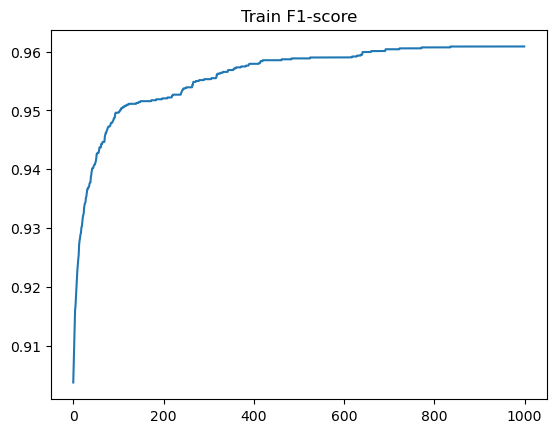

In [7]:
plt.plot(bftrain.mean(0))
plt.title("Train F1-score")

Text(0.5, 1.0, 'Test f1-score')

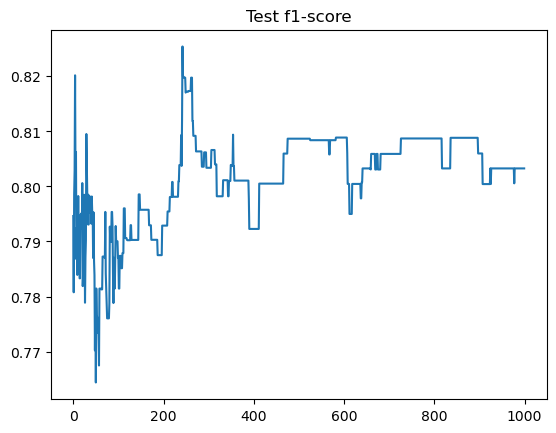

In [8]:
plt.plot(bftest.mean(0))
plt.title("Test f1-score")

Text(0.5, 1.0, 'Validation f1-score')

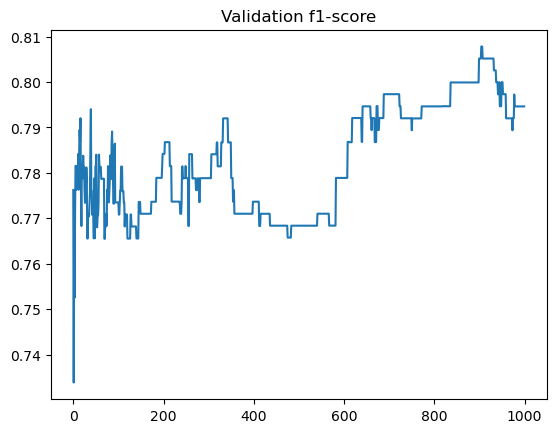

In [9]:
plt.plot(bfval.mean(0))
plt.title("Validation f1-score")

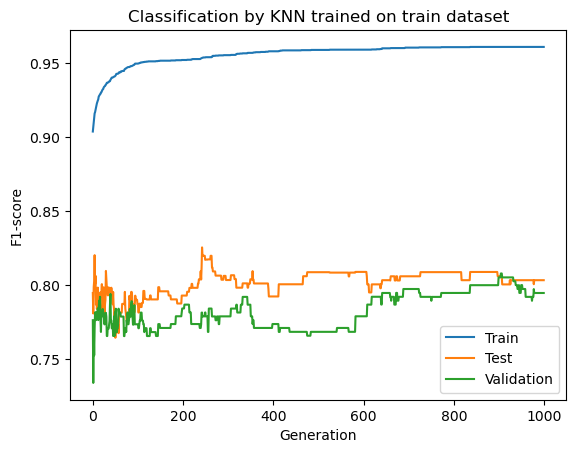

In [10]:
plt.plot(bftrain.mean(0), label="Train")
plt.plot(bftest.mean(0), label="Test")
plt.plot(bfval.mean(0), label="Validation")
plt.title("Classification by KNN trained on train dataset")
plt.ylabel("F1-score")
plt.xlabel("Generation")
plt.legend()
plt.show()

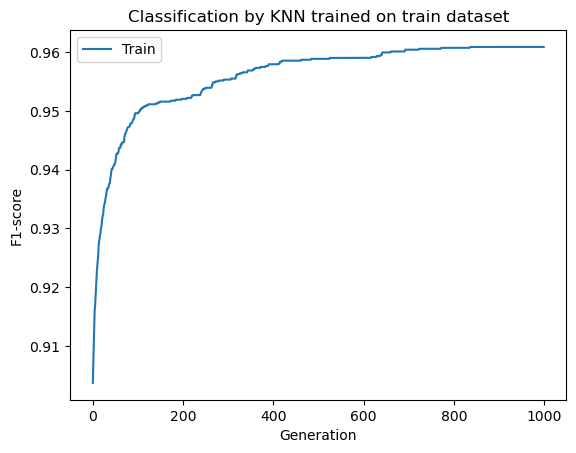

In [11]:
plt.plot(bftrain.mean(0), label="Train")
#plt.plot(bftest.mean(0), label="Test")
#plt.plot(bfval.mean(0), label="Validation")
plt.title("Classification by KNN trained on train dataset")
plt.ylabel("F1-score")
plt.xlabel("Generation")
plt.legend()
plt.show()

In [12]:
best_run = np.argmax(bftrain[:, -1])

In [13]:
bftest[best_run, -1]

0.8918918918918919

In [14]:
best_run

2

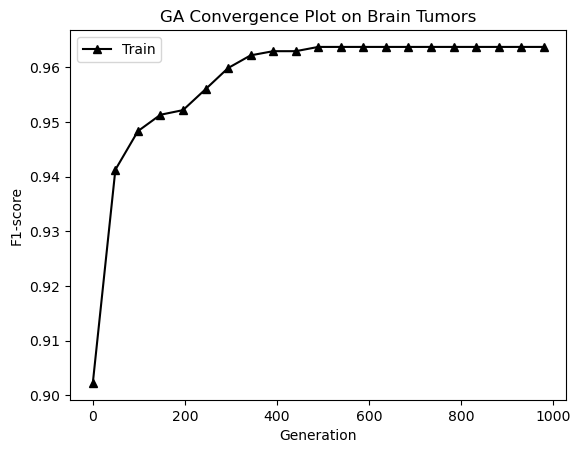

In [18]:
#plt.plot(bftrain[0], label="Train", c="black")
steps=np.arange(0,1000,49)
plt.plot(steps,bftrain[best_run][::49],'k^-', label="Train")
#plt.plot(bftest.mean(0), label="Test")
#plt.plot(bfval.mean(0), label="Validation")
plt.title("GA Convergence Plot on Brain Tumors")
plt.ylabel("F1-score")
plt.xlabel("Generation")
plt.legend()
plt.show()

In [27]:
first_row=["", "Train", "Test"]
init_res=["Init", bftrain.mean(0)[0], bftest.mean(0)[0]]
orig_res=["Original", 0.8916365592152186, 0.8235186204366172]
last_res=["Optimal", bftrain.mean(0)[-1], bftest.mean(0)[-1]]

In [28]:
df=pd.DataFrame([first_row, orig_res, last_res])

In [29]:
df

,0,1,2
0,,Train,Test
1,Original,0.891637,0.823519
2,Optimal,0.960878,0.803269


In [53]:
df.to_csv("orig_optim_table.csv")

In [30]:
orig_train_f1=0.8916365592152186
orig_test_f1=0.8235186204366172

In [31]:
first_row=["Feature order", "Train", "Test"]
orig_res=["Original", orig_train_f1, orig_test_f1]
#last_res=["Optimal", bftrain.mean(0)[-1], bftest.mean(0)[-1]]

In [33]:
"""for i in range(5):
    df_rows.append([f"Run {i+1}", bftrain[i,-1], bftest[i,-1], bfval[i,-1],])
last_res=["Mean", bftrain.mean(0)[-1], bftest.mean(0)[-1], bfval.mean(0)[-1]]
df_rows.append(last_res)
last_res=["Std", bftrain.std(0)[-1], bftest.std(0)[-1], bfval.std(0)[-1]]
df_rows.append(last_res)"""

'for i in range(5):\n    df_rows.append([f"Run {i+1}", bftrain[i,-1], bftest[i,-1], bfval[i,-1],])\nlast_res=["Mean", bftrain.mean(0)[-1], bftest.mean(0)[-1], bfval.mean(0)[-1]]\ndf_rows.append(last_res)\nlast_res=["Std", bftrain.std(0)[-1], bftest.std(0)[-1], bfval.std(0)[-1]]\ndf_rows.append(last_res)'

In [32]:
df_rows=[first_row, orig_res]
last_res=["Optimal", bftrain[best_run,-1], bftest[best_run,-1]]
df_rows.append(last_res)
last_res=["IAR", bftrain[best_run,-1]/orig_train_f1, bftest[best_run,-1]/orig_test_f1]
df_rows.append(last_res)

In [33]:
df=pd.DataFrame(df_rows)

In [34]:
df=df.T

In [35]:
df

,0,1,2,3
0,Feature order,Original,Optimal,IAR
1,Train,0.891637,0.963747,1.080874
2,Test,0.823519,0.891892,1.083026


In [36]:
df.to_csv("brain_orig_optim_table.csv", index=False)